# Welcome to CIAO

This is a **very** minimal example of the CIAO and Jupyter-notebook configuration in this Docker container.

In [1]:
!ciaover -v

The current environment is configured for:
  CIAO        : CIAO 4.10 Thursday, April 12, 2018
  Tools       : Package release 1  Thursday, April 12, 2018
  Sherpa      : Package release 1  Thursday, April 12, 2018
  Chips       : Not Installed
  Prism       : Not Installed
  Obsvis      : Not Installed
  Core        : Package release 1  Thursday, April 12, 2018
  Graphics    : Package release 1  Friday, December 1, 2017
  Contrib     : Package release 2  Tuesday, May 15, 2018
  bindir      : /opt/ciao-4.10/bin
  Python path : /opt/ciao-4.10/ots/bin
  CALDB       : Not installed

CIAO Installation: LinuxUP3
System information:
Linux 364bd32418b5 4.15.0-22-generic #24-Ubuntu SMP Wed May 16 12:15:17 UTC 2018 x86_64 x86_64 x86_64 GNU/Linux


What Python packages are available?

In [2]:
!pip3 list

Package                            Version 
---------------------------------- --------
altair                             2.1.0   
APLpy                              1.1.1   
astropy                            3.0.3   
atomicwrites                       1.1.5   
attrs                              18.1.0  
backports.shutil-get-terminal-size 1.0.0   
bash-kernel                        0.7.1   
bleach                             2.1.3   
caldb4                             0.1.0   
cycler                             0.10.0  
Cython                             0.25.2  
decorator                          4.0.11  
entrypoints                        0.2.3   
enums                              0.0.2   
funcsigs                           1.0.2   
html5lib                           1.0.1   
ipykernel                          4.8.2   
ipython                            4.2.0   
ipython-genutils                   0.2.0   
ipywidgets                         7.2.1   
Jinja2                          

This Docker image does not contain ChIPS, so visualization is done with Matplotlib.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
import matplotlib
print(matplotlib.__version__)

2.2.2


What else can we import?

In [6]:
import astropy
print(astropy.__version__)

3.0.3


In [7]:
import scipy
print(scipy.__version__)

1.1.0


In [8]:
import sherpa
from sherpa.astro import xspec

In [9]:
print(sherpa.__version__)
print(xspec.get_xsversion())

ciao4.10
12.9.1n


## CIAO examples

Read in a file from the CIAO test suite:

In [10]:
import pycrates

In [11]:
cr = pycrates.read_file('/opt/ciao-4.10/test/smoke/data/acisf04425_000N003_evt1.fits')
print(cr)

   Crate Type:        <TABLECrate>
   Crate Name:        EVENTS
   Ncols:             16
   Nrows:             46021



In [12]:
cr.get_colnames()

['time',
 'ccd_id',
 'node_id',
 'expno',
 'chip(chipx, chipy)',
 'tdet(tdetx, tdety)',
 'det(detx, dety)',
 'sky(x, y)',
 'phas',
 'pha',
 'pha_ro',
 'energy',
 'pi',
 'fltgrade',
 'grade',
 'status']

Let's try plotting a few columns. This Level 1 file happens to start with some events outside the main
observation, and so have SKY values which are not "sensible" (i.e. are not within the standard 0 to 8192
range for ACIS SKY coordinates):

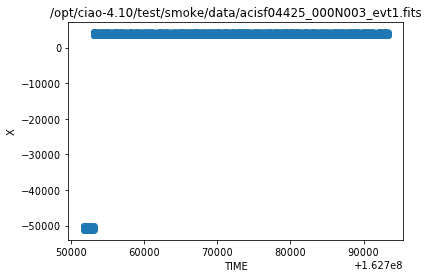

In [13]:
sky = cr.sky.values
plt.scatter(cr.time.values, sky[:, 0], alpha=0.1)
plt.xlabel('TIME')
plt.ylabel('X')
plt.title(cr.get_filename());

They can be filtered out:

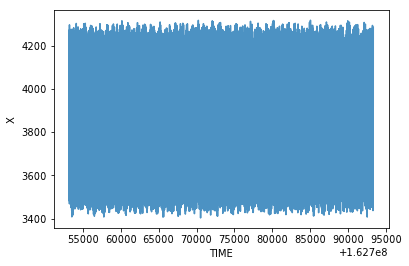

In [14]:
idx = sky[:, 0] > 0

plt.plot(cr.time.values[idx], sky[idx, 0], alpha=0.8)
plt.xlabel('TIME')
plt.ylabel('X');

This turns out to be not too informative (other than to say that the events are well spread over the range 3400 to 4300!

## How about a quick Sherpa fit?

Note that the Sherpa configuration has been set up so that it uses matplotlib for plotting, so the
Sherpa plots appear inline in this notebook.

In [15]:
from sherpa.astro import ui

In [16]:
ui.load_pha(1, '/opt/ciao-4.10/test/smoke/data/tools-specextract1_grp.pi')

read ARF file /opt/ciao-4.10/test/smoke/data/tools-specextract1.warf
read RMF file /opt/ciao-4.10/test/smoke/data/tools-specextract1.wrmf


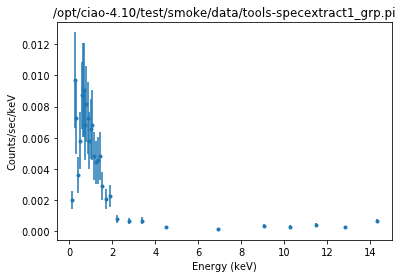

In [17]:
ui.plot_data()

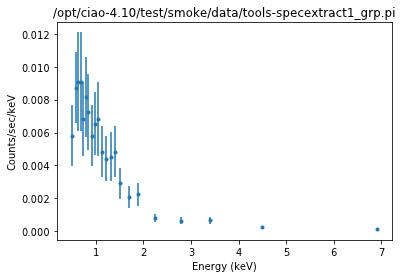

In [18]:
ui.notice(0.5, 6)
ui.plot_data()

Note that the following fit uses an XSPEC model (`phabs`):

In [19]:
ui.set_source(ui.xsphabs.gal * ui.powlaw1d.src)

In [20]:
ui.set_stat('chi2datavar')
ui.fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2datavar
Initial fit statistic = 3.87435e+12
Final fit statistic   = 15.8178 at function evaluation 282
Data points           = 22
Degrees of freedom    = 19
Probability [Q-value] = 0.669401
Reduced statistic     = 0.832513
Change in statistic   = 3.87435e+12
   gal.nH         0.00316085  
   src.gamma      1.90654     
   src.ampl       1.07332e-05 


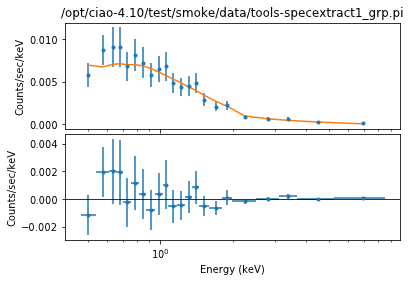

In [21]:
ui.set_xlog()
ui.plot_fit_resid()

In [22]:
ui.conf()

gal.nH lower bound:	-----
gal.nH upper bound:	0.0143198
src.ampl lower bound:	-7.75968e-07
src.ampl upper bound:	7.75639e-07
src.gamma lower bound:	-0.14084
src.gamma upper bound:	0.0931779
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2datavar
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   gal.nH         0.00316085        -----    0.0143198
   src.gamma         1.90654     -0.14084    0.0931779
   src.ampl      1.07332e-05 -7.75968e-07  7.75639e-07


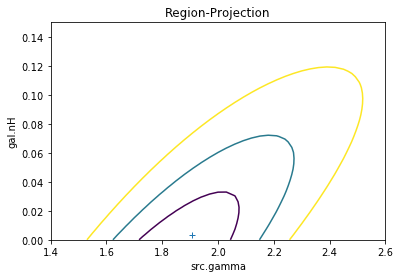

In [23]:
ui.reg_proj(src.gamma, gal.nh, min=(1.4, 0), max=(2.6, 0.15), nloop=(41, 41))